In [1]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def analyze_feature_distributions(data, labels, feature_names):
    """
    Analyze the distribution of each feature for each cluster.
    Args:
        data (ndarray): The dataset (scaled).
        labels (ndarray): Cluster labels for the data.
        feature_names (list): Names of the features in the dataset.

    Returns:
        feature_analysis (dict): Feature-wise distribution analysis.
    """
    unique_labels = np.unique(labels)
    feature_analysis = {}

    for label in unique_labels:
        cluster_data = data[labels == label]

        feature_analysis[label] = {}
        print(f"\nCluster {label} Feature Analysis:")

        for i, feature in enumerate(feature_names):
            mean = np.mean(cluster_data[:, i])
            std_dev = np.std(cluster_data[:, i])
            feature_analysis[label][feature] = {"Mean": mean, "Std Dev": std_dev}

            print(f"  {feature}: Mean = {mean:.2f}, Std Dev = {std_dev:.2f}")

            # Visualize feature distribution
            sns.kdeplot(cluster_data[:, i], label=f"Cluster {label}", fill=True, alpha=0.5)

        plt.title(f"Distribution of Feature '{feature}'")
        plt.xlabel(feature)
        plt.ylabel("Density")
        plt.legend()
        plt.show()

    return feature_analysis


def plot_feature_histograms(data, labels, feature_names):
    """
    Plot histograms for each feature across clusters.
    Args:
        data (ndarray): The dataset (scaled).
        labels (ndarray): Cluster labels for the data.
        feature_names (list): Names of the features in the dataset.
    """
    unique_labels = np.unique(labels)
    n_features = data.shape[1]

    for i, feature in enumerate(feature_names):
        plt.figure(figsize=(8, 6))

        for label in unique_labels:
            cluster_data = data[labels == label]
            plt.hist(cluster_data[:, i], bins=15, alpha=0.5, label=f"Cluster {label}")

        plt.title(f"Histogram of Feature '{feature}' by Cluster")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()


def extended_cluster_analysis(data, n_clusters, feature_names):
    """
    Perform extended analysis on clusters, including feature-wise distributions.
    Args:
        data (ndarray): The dataset (scaled).
        n_clusters (int): Number of clusters.
        feature_names (list): Names of the features in the dataset.

    Returns:
        cluster_analysis (dict): Analysis results including feature distributions.
    """
    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(scaled_data)

    # Visualize clusters
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
    plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', marker='X', s=200)
    plt.title("Cluster Visualization with Centroids")
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.show()

    # Analyze feature distributions
    feature_analysis = analyze_feature_distributions(scaled_data, labels, feature_names)

    # Plot histograms for each feature
    plot_feature_histograms(scaled_data, labels, feature_names)

    return feature_analysis

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


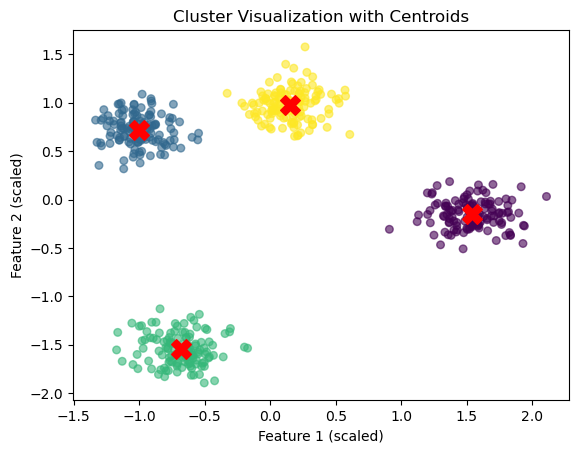


Cluster 0 Feature Analysis:
  Feature 1: Mean = 1.54, Std Dev = 0.20
  Feature 2: Mean = -0.15, Std Dev = 0.14


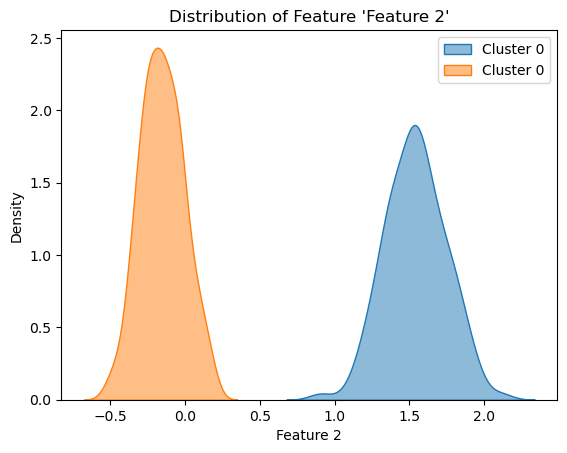


Cluster 1 Feature Analysis:
  Feature 1: Mean = -1.00, Std Dev = 0.16
  Feature 2: Mean = 0.72, Std Dev = 0.16


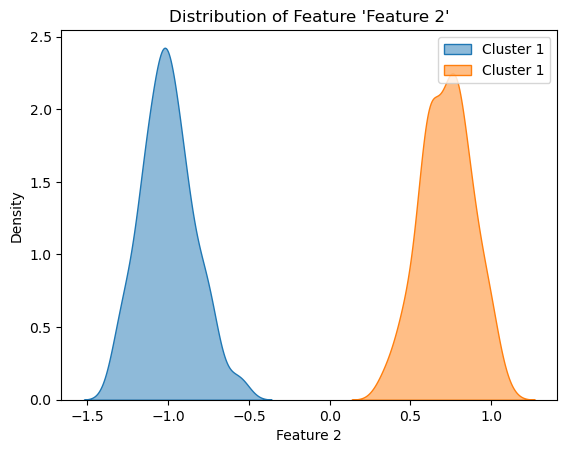


Cluster 2 Feature Analysis:
  Feature 1: Mean = -0.68, Std Dev = 0.19
  Feature 2: Mean = -1.55, Std Dev = 0.16


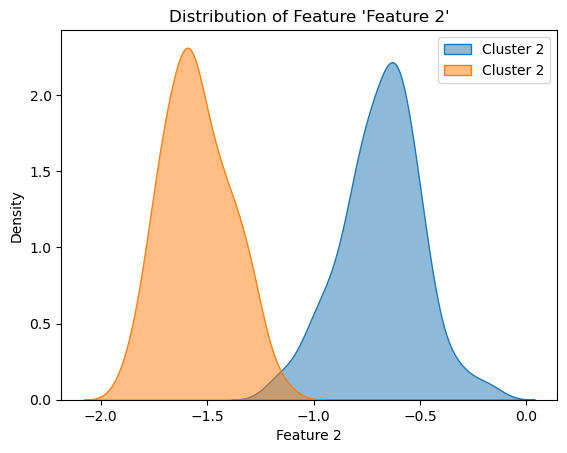


Cluster 3 Feature Analysis:
  Feature 1: Mean = 0.15, Std Dev = 0.18
  Feature 2: Mean = 0.98, Std Dev = 0.16


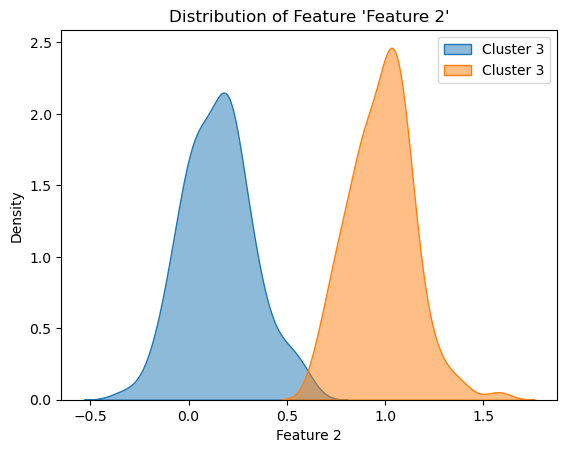

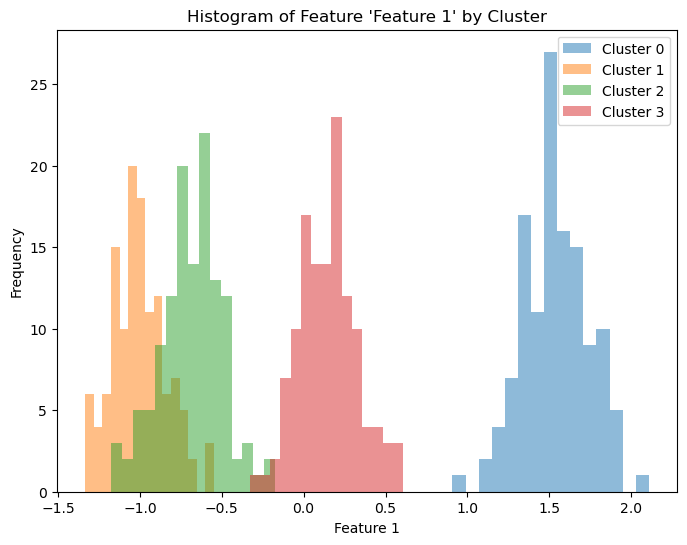

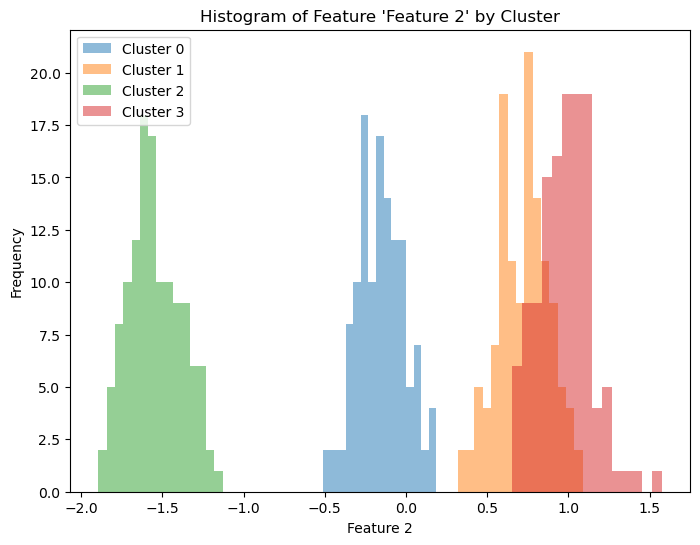

In [2]:
if __name__ == "__main__":
    # Generate synthetic data
    from sklearn.datasets import make_blobs
    data, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)
    feature_names = [f"Feature {i + 1}" for i in range(data.shape[1])]

    # Perform extended analysis
    n_clusters = 4
    cluster_analysis = extended_cluster_analysis(data, n_clusters, feature_names)